심층 신경망을 만들기 위해 100개의 뉴런을 가진 은닉층 추가하기

In [1]:
# 실행마다 동일한 결과를 얻기 위해 케라스 랜덤 시드를 사용하도록 설정
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

In [4]:
# 패션 MNIST를 가져오기 위해 Keras를 import
from tensorflow import keras

# 패션 훈련데이터와 테스트(검증) 데이터를 나눠주는 함수 사용
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [5]:
# 사이킷런으로 훈련데이터와 테스트데이터를 분류
from sklearn.model_selection import train_test_split

train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

# 패션 MNIST 훈련데이터를 가지고 또 다시 4:1로 훈련데이터와 테스트데이터로 분류
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [6]:
# 기존 층(layer)에 추가적인 은닉층을 활성화함수와 같이 세팅
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,)) # (100은 은닉층 뉴런의 개수(분류개수), 뉴런의 출력에 적용할 활성화함수, 입력크기)
dense2 = keras.layers.Dense(10, activation='softmax') # (10은 출력 뉴런의 개수(분류개수), 뉴런의 출력에 적용할 활성화함수, 입력크기)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# 심층 신경망 모델 생성(현재는 2개의 층)
model = keras.Sequential([dense1, dense2]) # 층을 리스트로 전달, 모델 이름을 'fashion_mnist_model'로 지정

model.summary() # 모델의 층에 대한 정보를 출력

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# 만들어진 케라스 심층신경망 모델에서는 compile이라는 메소드를 실행해야하는 설정을 꼭 해야함
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])   # categorical_crossentropy 다중 분류일 때 사용, binary_crossentropy 이진 분류일 때 사용

model.fit(train_scaled, train_target, epochs=5)  # epochs는 에폭값으로 한번 iteration값

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7541 - loss: 0.7731
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8479 - loss: 0.4233
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8604 - loss: 0.3833
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8689 - loss: 0.3583
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8757 - loss: 0.3394


# 렐루 함수: 시그모이드 함수의 단점을 극복한 함수로 음수일 경우에는 무조건 0으로 만들고 양수일 경우에는 선형비례하는 선을 만드는 함수

In [9]:
# Keras를 이용하여 렐루(ReLU) 활성화 함수 사용해보기
model = keras.Sequential();
model.add(keras.layers.Flatten(input_shape=(28, 28)))    # 차원 축소 (2차원 -> 1차원)
model.add(keras.layers.Dense(100, activation='relu'))    # 활성화 함수로 시그모이드 함수 대신 relu(렐루) 함수 사용
model.add(keras.layers.Dense(10, activation='softmax'))  # 마지막 뉴런 분류에는 소프트맥스 함수 사용

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
from sklearn.model_selection import train_test_split

# 패션 훈련데이터와 테스트(검증) 데이터를 나눠주는 함수 사용
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0
# train_scaled = train_scaled.reshape(-1, 28*28)

# 패션 MNIST 훈련데이터를 가지고 또 다시 4:1로 훈련데이터와 테스트데이터로 분류
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [14]:
# 활성화함수변경을 통해서 만들어진 케라스 심층신경망 모델
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])   # categorical_crossentropy 다중 분류일 때 사용, binary_crossentropy 이진 분류일 때 사용

model.fit(train_scaled, train_target, epochs=10)  # epochs는 에폭값으로 한번 iteration값

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8896 - loss: 0.3089
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8967 - loss: 0.2944
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9006 - loss: 0.2827
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9052 - loss: 0.2759
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9060 - loss: 0.2694
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9100 - loss: 0.2619
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9118 - loss: 0.2575
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9138 - loss: 0.2499
Epoch 9/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9168 - loss: 0.2472
Epoch 10/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9191 - loss: 0.2434


In [13]:
# 렐루 활성화 함수를 적용한 평가점수 측정
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8726 - loss: 0.3714


[0.3724193871021271, 0.8705833554267883]

 # 옵티마이저 옵션값으로 다시 심층 신경망 모델 학습하기


In [15]:
# sgd(기본경사하강법) 옵티마이저로 세팅
# 아래 코드와 같음 -> mode.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
sgd = keras.optimizers.SGD()
model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# sgd 옵티마이저 학습율과 모멘텀(0보다 큰 값으로 지정하면 마치 이전의 그레디언트의 가속도를 사용하는 것과 같음), 네스테로프 모멘텀 최적화(가속 경사)을 세팅
sgd = keras.optimizers.SGD(learning_rate=0.1, momentum=0.9, nesterov=True)

model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(train_scaled, train_target, epochs=5)  # epochs는 에폭값으로 한번 iteration값

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7833 - loss: 0.6605
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7968 - loss: 0.5730
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8259 - loss: 0.5191
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8322 - loss: 0.5099
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8289 - loss: 0.5134


In [16]:
# 적응적 학습율 옵티마이저(RMSprop)로 세팅하여 모델 생성
rmsprop = keras.optimizers.RMSprop()

model.compile(optimizer=rmsprop, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델에 학습관련 곡선 데이터를 받기 위해 history 변수를 세팅
history = model.fit(train_scaled, train_target, epochs=5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7715 - loss: 0.6674
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8550 - loss: 0.4062
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8721 - loss: 0.3588
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8818 - loss: 0.3296
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8890 - loss: 0.3069


Matplotlib 라이브러리로 기타 곡선들을 표현하기(손실곡선, 정확도곡선, 에포크 곡선 등등)

In [20]:
# history 변수에 담긴 항목들을 가져오기
history.history.keys()

dict_keys(['accuracy', 'loss'])

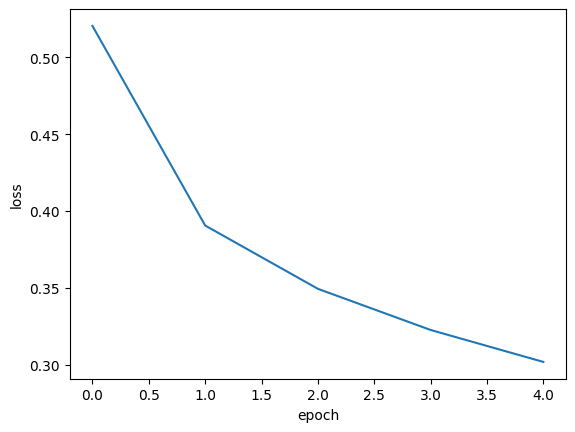

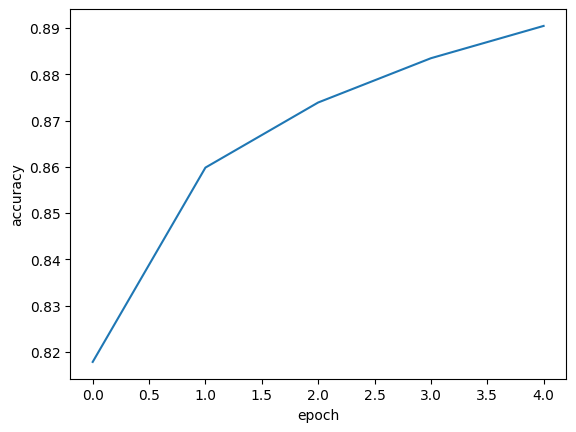

In [23]:
import matplotlib.pyplot as plt

# 손실곡선 그래프 표현
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# 정확도곡선 그래프 표현
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [32]:
# 모델 만드는 함수를 따로 생성
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))

    return model

In [25]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델에 학습관련 곡선 데이터를 받기 위해 history 변수를 세팅
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)   # verbose는 학습과정을 그래프로 표현 여부를 나타냄(0: 학습과정을 보여주지 않음)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


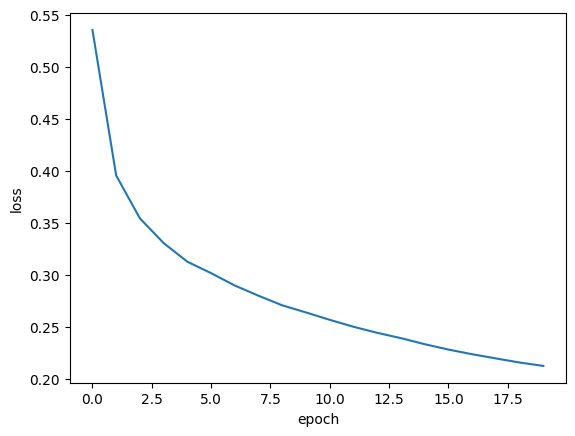

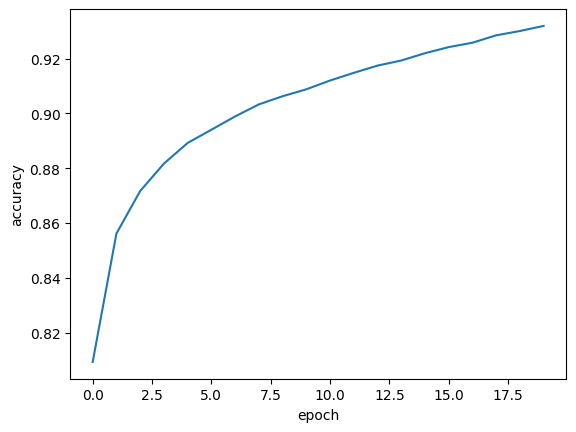

In [26]:
# epoch값이 20일 경우의 손실데이터와 정확도데이터 그래프 확인
# 손실곡선 그래프 표현
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# 정확도곡선 그래프 표현
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [27]:
# 검증 손실 그래프를 확인하기 위해 테스트(검증)데이터를 가지고 학습된 모델을 생성(validation_data 파라미터값 사용)
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [28]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

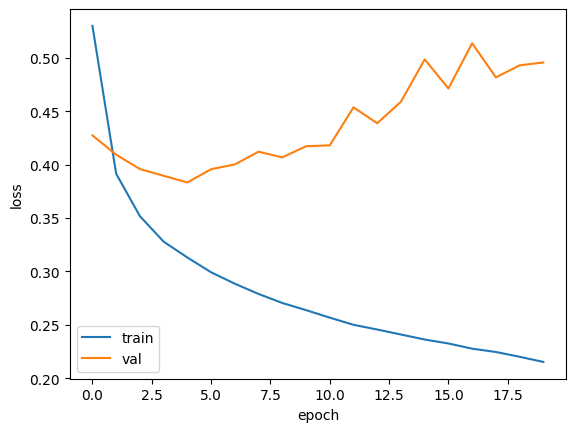

In [29]:
# train과 val의 손실곡선 그래프 표현
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7681 - loss: 0.6693 - val_accuracy: 0.8433 - val_loss: 0.4316
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8559 - loss: 0.4029 - val_accuracy: 0.8577 - val_loss: 0.3866
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8720 - loss: 0.3577 - val_accuracy: 0.8637 - val_loss: 0.3675
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8801 - loss: 0.3292 - val_accuracy: 0.8672 - val_loss: 0.3568
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8881 - loss: 0.3061 - val_accuracy: 0.8727 - val_loss: 0.3521
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8920 - loss: 0.2899 - val_accuracy: 0.8738 - val_loss: 0.3445
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8965 - loss: 0.2772 - val_accuracy: 0.8765 - val_loss: 0.3443
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9035 - loss: 0.2651 -

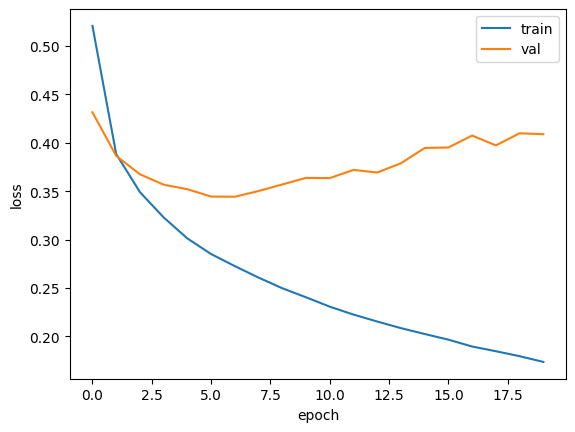

In [30]:
# 옵티마이저를 사용(여기서는 adam함수 사용)하여 validation_data와 함께 모델을 생성
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target))

# train과 val의 손실곡선 그래프 표현
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

드롭아웃: 딥러닝의 아버지로 불리는 제프리 힌턴이 만든 것으로 일부러 층에 있는 뉴런들을 랜덤하게 빼는 혹은 없애는 것으로서 과대적합을 막는 기능

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7316 - loss: 0.7671 - val_accuracy: 0.8470 - val_loss: 0.4250
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8368 - loss: 0.4573 - val_accuracy: 0.8572 - val_loss: 0.3852
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8502 - loss: 0.4137 - val_accuracy: 0.8679 - val_loss: 0.3605
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8580 - loss: 0.3898 - val_accuracy: 0.8681 - val_loss: 0.3596
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8646 - loss: 0.3717 - val_accuracy: 0.8736 - val_loss: 0.3496
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8698 - loss: 0.3582 - val_accuracy: 0.8752 - val_loss: 0.3432
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8736 - loss: 0.3462 - val_accuracy: 0.8773 - val_loss: 0.3434
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8758 - loss: 0.3371

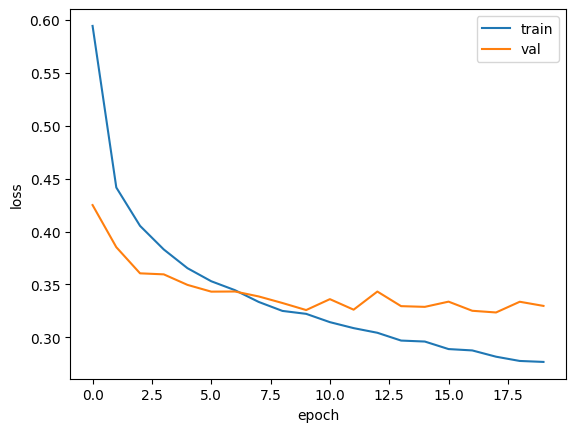

In [33]:
# 기존 은닉층에 드롭아웃 기능을 추가한 모델 생성
model = model_fn(keras.layers.Dropout(0.3))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target))

# train과 val의 손실곡선 그래프 표현
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

만들어진 모델에 대해 아래와 같은 기능 사용하기
  * 저장(save, save_weights)
  * 복원(load_model, load_weights)
  * 콜백(callbacks.ModelCheckpoint)
  * 조기종료(callbacks.EarlyStopping)

In [52]:
# 텐서플로우의 케라스 같은 경우 모델의 파라미터를 저장할 수 있도록 save_weights() 메소드를 제공
# save()메소드를 통해서는 모델의 구조와 파라미터까지 저장할 수 있도록 제공
model.save('model-whole.keras')

In [53]:
# 파일이름의 확장자 같은 경우 'h5'라는 확장자를 사용할 경우 HDF5 포맷으로 저장
model.save_weights('model.weights.h5')

In [57]:
# 만들어진 모델 파일을 확인하기
!ls -al

total 972
drwxr-xr-x 1 root root   4096 Sep 20 08:02 .
drwxr-xr-x 1 root root   4096 Sep 20 05:51 ..
drwxr-xr-x 4 root root   4096 Sep 18 13:24 .config
-rw-r--r-- 1 root root 975719 Sep 20 07:55 model-whole.keras
drwxr-xr-x 1 root root   4096 Sep 18 13:25 sample_data


In [56]:
# 저장된 모델을 사용하기 위해 모델을 복원하여 패션 MNIST 분류하는 프로그램을 사용하기
model = keras.models.load_model('model-whole.keras')

import numpy as np

val_labels = np.argmax(model.predict(val_scaled), axis=-1)  # predict한 검증세트 값들의 가장 큰 값을 가진 인덱스의 마지막 차원인 값만 val_labels에 저장하기
print(val_labels)
print(val_target)
print(np.mean(val_labels == val_target))

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[8 8 7 ... 8 8 6]
[8 8 7 ... 8 8 1]
0.8826666666666667


Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9101 - loss: 0.2330 - val_accuracy: 0.8862 - val_loss: 0.3476
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9129 - loss: 0.2329 - val_accuracy: 0.8868 - val_loss: 0.3488
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9130 - loss: 0.2320 - val_accuracy: 0.8883 - val_loss: 0.3469
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9132 - loss: 0.2264 - val_accuracy: 0.8892 - val_loss: 0.3537
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9119 - loss: 0.2258 - val_accuracy: 0.8862 - val_loss: 0.3502


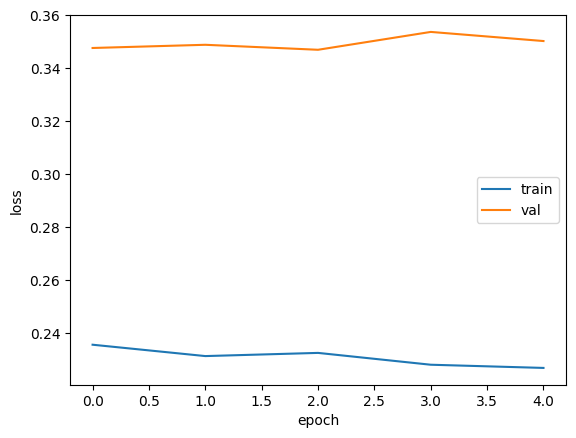

In [61]:
# 콜백 사용하기
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras', save_best_only=True)
# 조기종료 사용하기
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

# 만들어진 'best-model.h5'에 다시 학습을 시켜 새로운 'best-model.keras'파일 생성
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

# train과 val의 손실곡선 그래프 표현
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()